<a href="https://colab.research.google.com/github/ThomasGVoss/LearningFactory/blob/main/Lab_Data_Developing_a_Regressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic introduction:
The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

Business understanding – What does the business need?
Data understanding – What data do we have / need? Is it clean?
Data preparation – How do we organize the data for modeling?
Modeling – What modeling techniques should we apply?
Evaluation – Which model best meets the business objectives?
Deployment – How do stakeholders access the results?
Published in 1999 to standardize data mining processes across industries, it has since become the most common methodology for data mining, analytics, and data science projects.

In this notebook we will take a look at the steps four and five.

IV. Modeling
Models are generated to do predictions based on the provided data to assit solving the questions defined in Phase I.

V. Evaluation
The Evaluation phase looks more broadly at which model best meets the business and what to do next.

### Objective in this Notebook

Generate a first model and evaluate the performance


In [1]:
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import display               # For displaying outputs in the notebook

from sklearn.metrics import r2_score
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# ensure graphs are displayed correctly inline in this notebook
%matplotlib inline

Load the data again...

In [2]:
data = pd.read_csv('output.csv', index_col=0)
data = data.dropna(axis=0)

data.head()

,ProcessId,RoundId,Workstation,Start,End,ProcessDurationInSeconds,Type,ProductionStart,ProductionEnd,ProductionDurationInSeconds
0,2178,243,1,2025-08-29 16:14:04,2025-08-29 16:14:41,37.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
2,2178,243,4,2025-08-29 16:14:55,2025-08-29 16:18:42,227.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
3,2179,243,1,2025-08-29 16:15:49,2025-08-29 16:16:40,51.0,7.0,2025-08-29 16:15:37,2025-08-29 16:20:00,263.0
7,2179,243,5,2025-08-29 16:17:07,2025-08-29 16:19:48,161.0,7.0,2025-08-29 16:15:37,2025-08-29 16:20:00,263.0
9,2180,243,1,2025-08-29 16:19:42,2025-08-29 16:20:12,30.0,8.0,2025-08-29 16:19:34,2025-08-29 16:25:40,366.0


## Phase 4: Modeling

Based on the problem you are trying to solve, an appropriate method has to be selected. Analytics is about explaining the past and predicting the future. To do so we split the data into Features and Targets for further training

In [3]:
X = data[['Workstation','Type']].copy()
y = data['ProcessDurationInSeconds']


Then split the original dataset into multiple subsets. <br>
We use a Train test Split based on a percentage.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

,Workstation,Type
53,5,7.0
29,4,7.0
0,1,6.0
9,1,8.0
38,1,6.0
11,4,8.0
30,5,6.0
27,1,6.0
47,1,7.0
2,4,6.0


A simple model that is explainable for the Supervised learning category, solving a simple regreession problem - Decission Trees

In [5]:
regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=5)
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


use the first value of the test data that has not been in the training data

In [6]:
X_test[1:2]

,Workstation,Type
35,1,8.0


In [7]:
regressor.predict(X_test[1:2])

array([59.2])

Get the feature importance and check, which value has the highest impact on the target

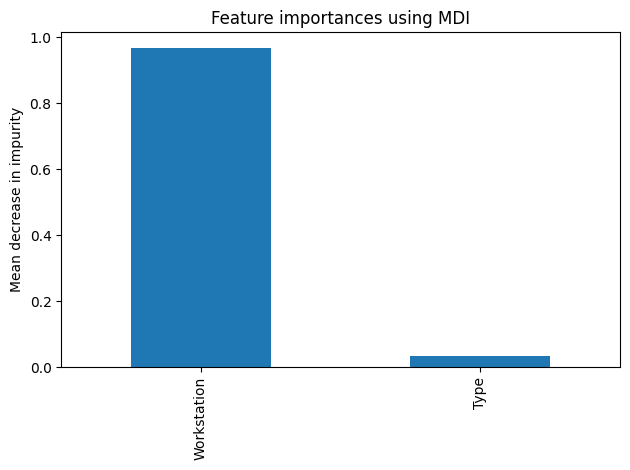

In [8]:
importances = regressor.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
l = list(X_train.columns.values)
i = 0

for feature, importance in enumerate(importances):
  print("Feature " + l[i] + " with value " + str(round(importance,3)))
  i += 1

Feature Workstation with value 0.967
Feature Type with value 0.033


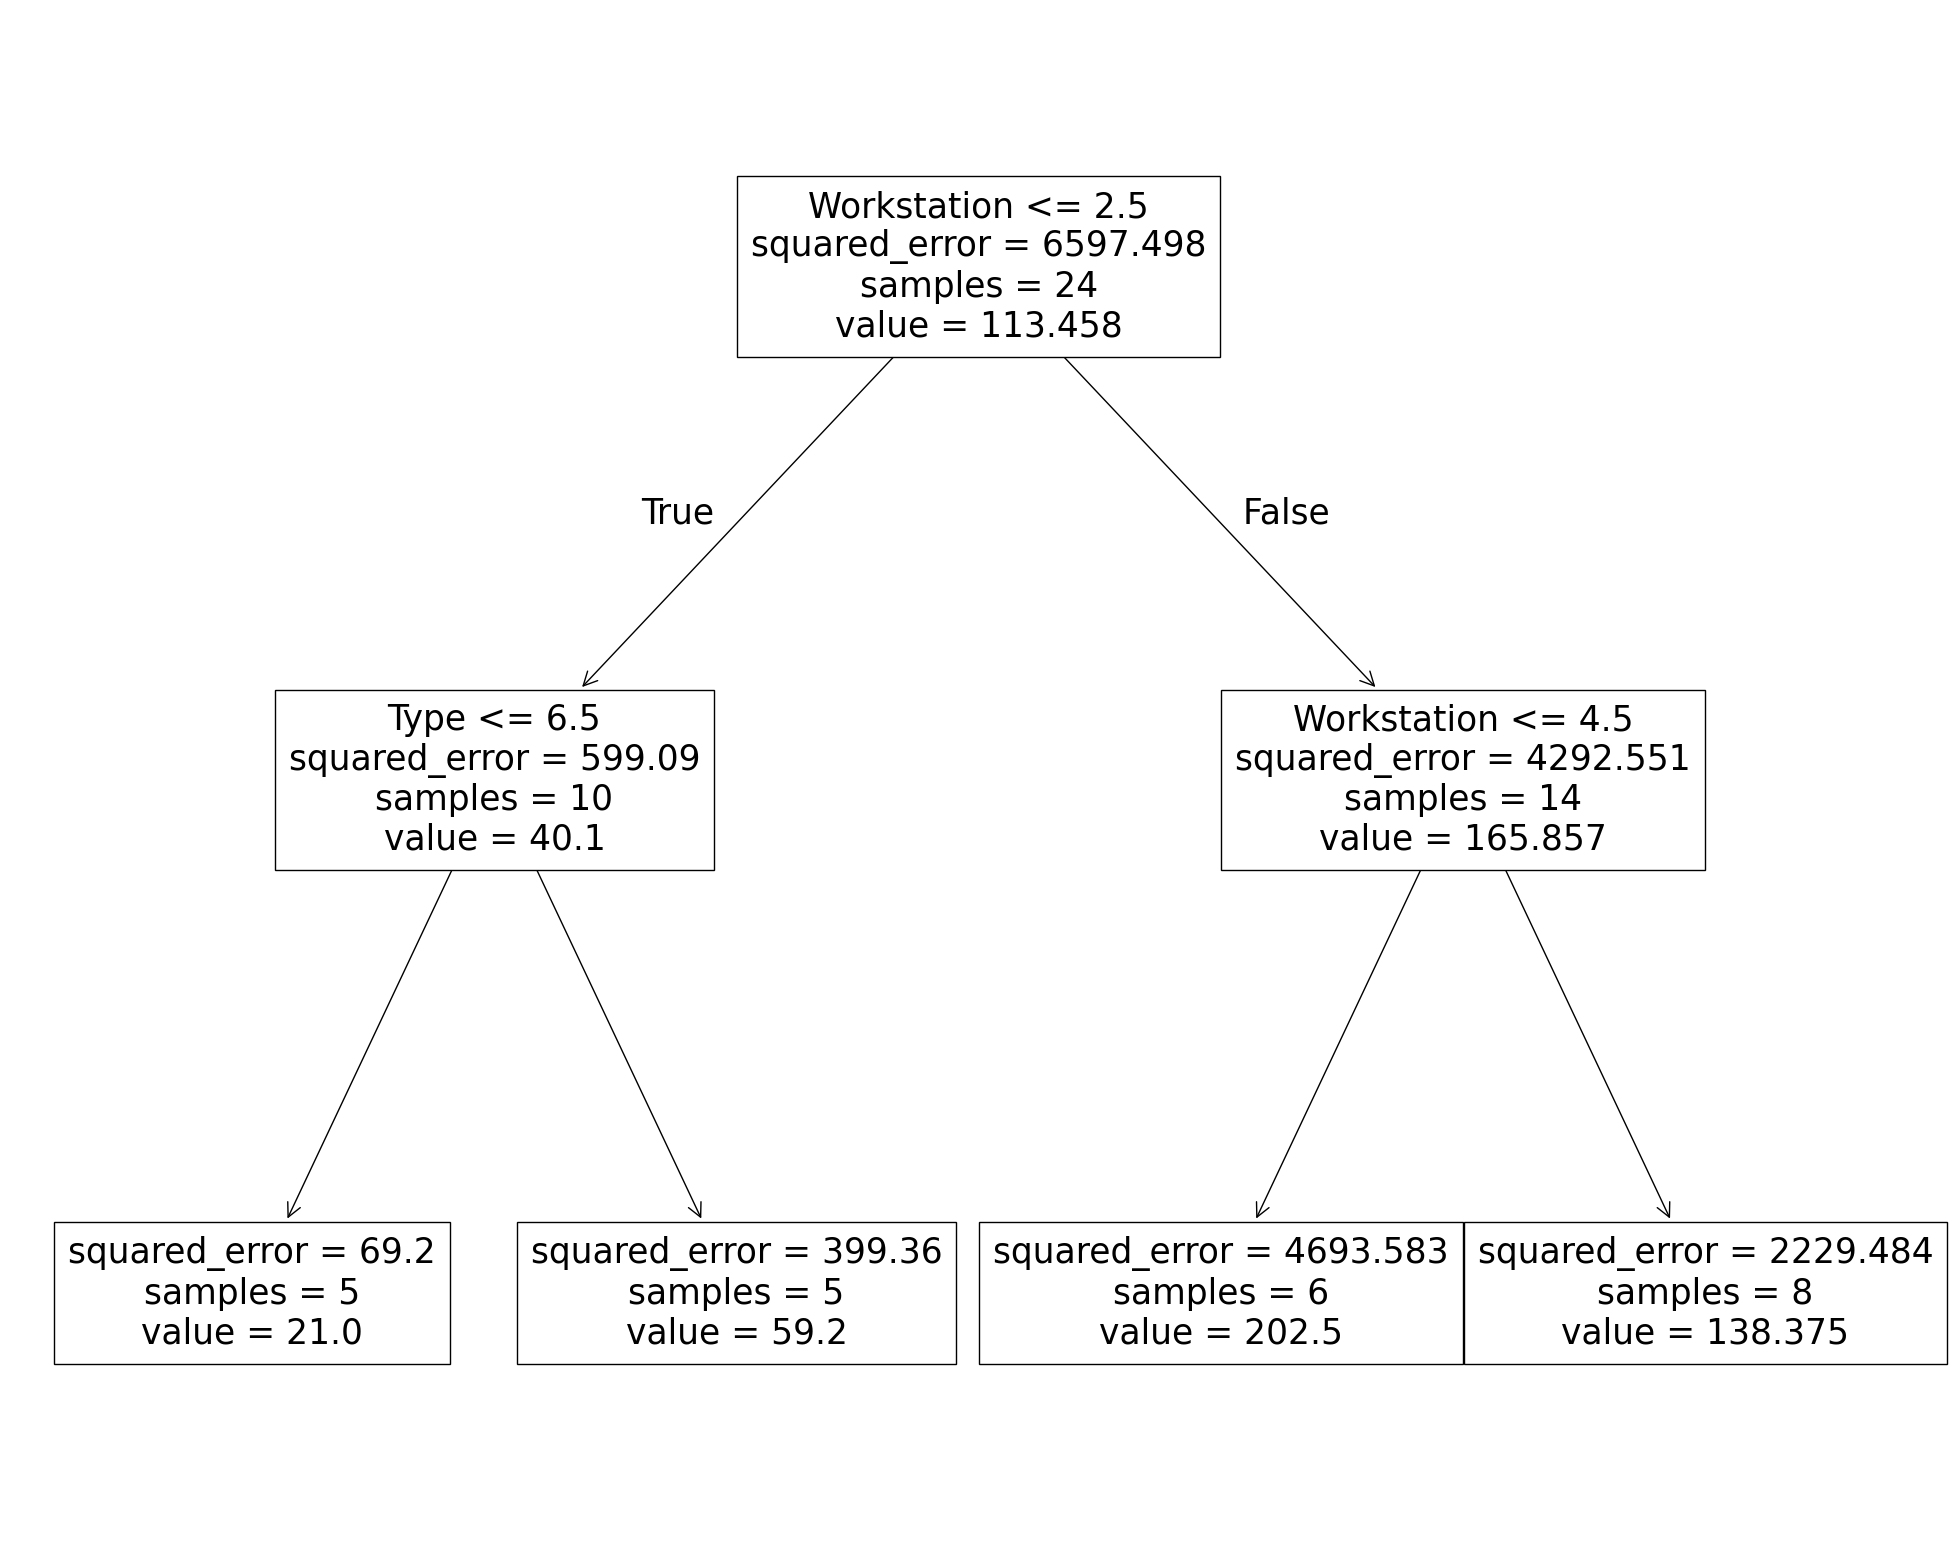

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names= X_train.columns.values)

## Phase 5 -  Evaluation:

At this point, you have a model, but how do you know that it will work for you? What is the performance of the model? In this phase, you evaluate the model by using standard methods that measure the accuracy of the model and its performance in the field.
We have multiple measurements avaiable which can be used to describe the error of a regression method: r² or mean (squere) error are popular ones






In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([ 63.66666667,  75.57142857, 111.88888889, 119.13333333,
        75.57142857, 119.13333333,  63.66666667,  75.57142857,
        63.66666667,  63.66666667,  75.57142857,  63.66666667,
        75.57142857, 111.88888889, 111.88888889,  75.57142857,
       119.13333333,  60.83333333,  75.8       ,  31.90909091])

In [13]:
y_test

81     32.0
77     31.0
73     28.0
95     26.0
33     84.0
80     68.0
69     70.0
42    102.0
0      61.0
10     62.0
64    103.0
30     78.0
18     50.0
4     114.0
31    123.0
26    137.0
12     40.0
22     62.0
53     25.0
86      2.0
Name: ProcessDurationInSeconds, dtype: float64

In [14]:
r_sq = r2_score(y_test,y_pred)
print("R² is: " + str(r_sq))

R² is: -0.4427205827833611


In [15]:
abs_e = np.abs(y_test - y_pred)
mae = np.mean(abs_e)
print("Mean Absolute Error (MAE) is:" + str(mae))

Mean Absolute Error (MAE) is:32.645533910533906


(0.0, 200.0)

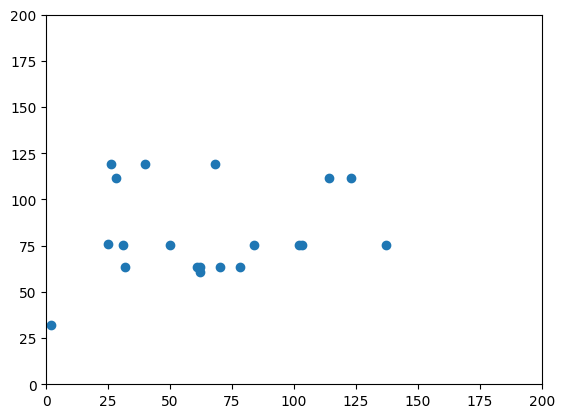

In [49]:
plt.scatter(y_test,y_pred)
plt.xlim(0,200)
plt.ylim(0,200)

## What we can learn from this:

Given the r² and MAE the model does not perform very well.

Go back to the feature engineering and redo that!

The number of observations might be too small and the features not good enough.
Let us go back to the learning factory and check what we can do next.
